# How to make a classification problem linearly separable with feature engineering (creating features in a preprocessing phase)


## Allined data

In [74]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


let's start with a 1-dimensional 5 points dataset
[-2 -1  0  1  2]


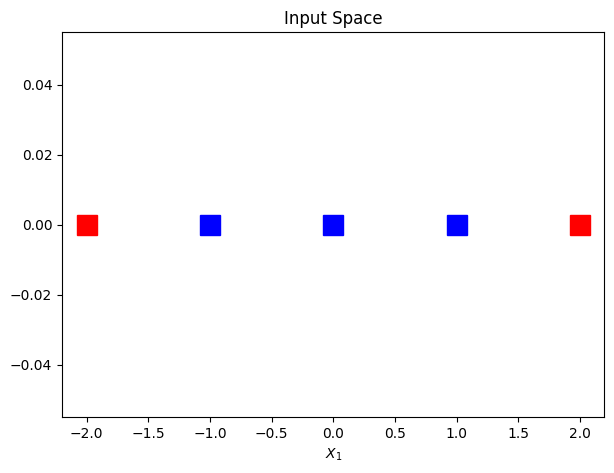

In [75]:
#X = np.array([ [-2,0], [-1,0], [0,0], [1,0], [2,0] ])
X = np.array([-2, -1, 0, 1, 2]).T
Y = np.array([-1, 1, 1, 1, -1]) 
print("let's start with a 1-dimensional 5 points dataset")
print(X)
fig = plt.figure(figsize=(7,5))
plt.plot(X[Y == -1], 0*X[Y == -1], 'rs', markersize=15)
plt.plot(X[Y == 1], 0*X[Y == 1], 'bs', markersize=15)
plt.xlabel("$X_1$")
plt.title('Input Space')
plt.show()


let's add a feature (a column to X) by squaring the values of X
[[-2  4]
 [-1  1]
 [ 0  0]
 [ 1  1]
 [ 2  4]] 



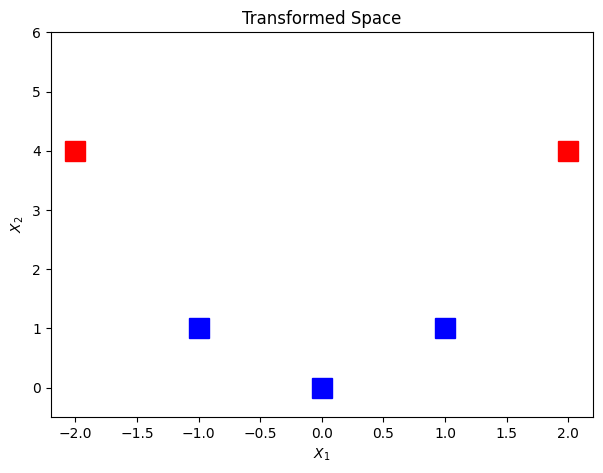

In [76]:
Xnew = np.vstack( (X, X**2) ).T 
print("let's add a feature (a column to X) by squaring the values of X")
print(Xnew, "\n")
#Plotting
fig = plt.figure(figsize=(7,5))
plt.plot(Xnew[:, 0][Y == -1], Xnew[:, 1][Y == -1], 'rs', markersize=15)
plt.plot(Xnew[:, 0][Y == 1], Xnew[:, 1][Y == 1], 'bs', markersize=15)
plt.ylim([-0.5, 6])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title('Transformed Space')
plt.show()


accuracy = 1.0 



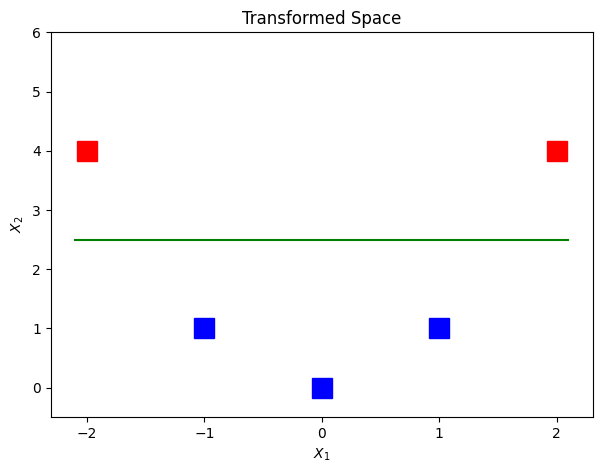

In [77]:
clf = Perceptron(fit_intercept = True)
clf.fit(Xnew, Y)
y_pred = clf.predict(Xnew)
# we expect 100% accuracy in this configuration
print("accuracy =", accuracy_score(Y,y_pred), "\n")
# is a 2D space so we have the intercept/bias and two coefficients
theta_perc = np.array([ [clf.intercept_[0] ], [clf.coef_[0,0]], [clf.coef_[0,1]] ])

fig = plt.figure(figsize=(7,5))
plt.plot(Xnew[:, 0][Y == -1], Xnew[:, 1][Y == -1], 'rs', markersize=15)
plt.plot(Xnew[:, 0][Y == 1], Xnew[:, 1][Y == 1], 'bs', markersize=15)
plt.ylim([-0.5, 6])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title('Transformed Space')
Xvalues = np.linspace(-2.1, 2.1,20)
plt.plot(Xvalues, -Xvalues*theta_perc[1]/theta_perc[2]-theta_perc[0]/theta_perc[2], 'g') 
# I could have just used X[:,0] values for the x-axis (in this case is horizontal)
plt.show()


## XOR Problem
Let's try now to solve the XOR problem

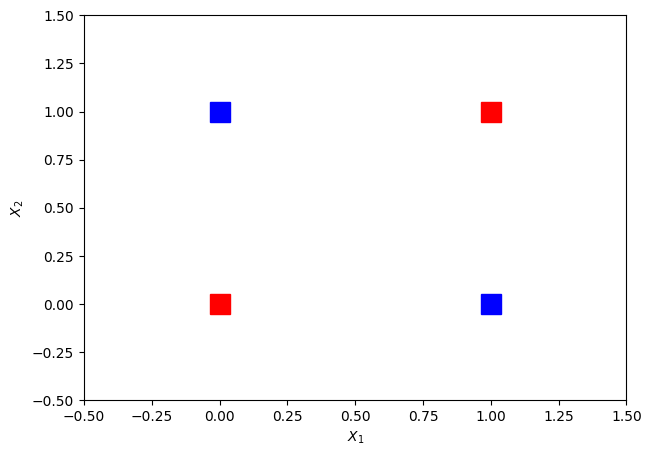

In [78]:
X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array( [-1, 1, 1, -1] ) 

#Plotting
fig = plt.figure(figsize=(7,5))
plt.plot(X[:, 0][Y == -1], X[:, 1][Y == -1], 'rs', markersize=15)
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs', markersize=15)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.show()


You can check that the data is not linearly separable. 

Even this time we add a new feature that is the product of the two inputs. 

Then we train a perceptron and check the accuracy on the data.

In [79]:
Xnew = np.hstack( ( X, np.reshape(X[:,0]*X[:,1],(4,1)) ) )
print("X = \n", X)
print("Xnew = \n", Xnew)
clf = Perceptron(fit_intercept = True)
clf.fit(Xnew, Y)
y_pred = clf.predict(Xnew)
print("accuracy =", accuracy_score(Y,y_pred), ", then the new data are linearly separable!\n")
print("We can also compare the predictions of the perceptron with the gold labels")
print(y_pred, Y)


X = 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Xnew = 
 [[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]]
accuracy = 1.0 , then the new data are linearly separable!

We can also compare the predictions of the perceptron with the gold labels
[-1  1  1 -1] [-1  1  1 -1]


We can finally plot the original data points in 3D (left figure), then the data points with the new feature (middle figure), and the separating hyperplane (right figure)

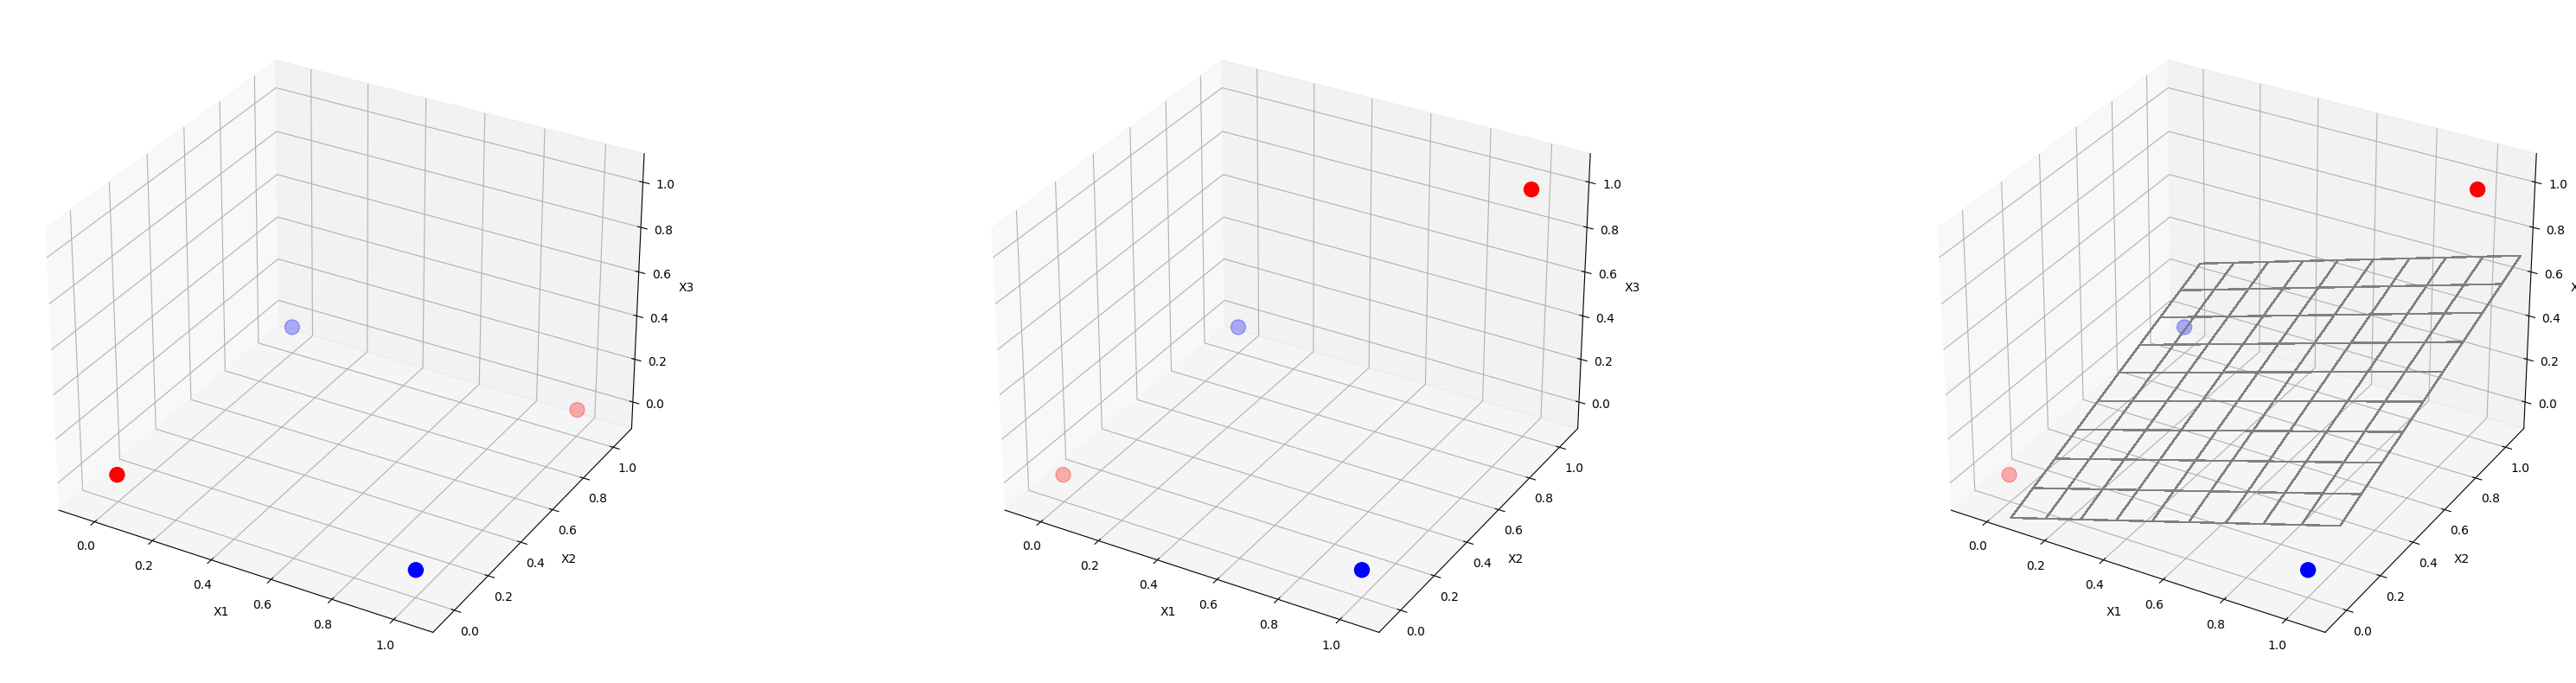

In [80]:
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(1,3,1, projection='3d')
ax1.scatter(Xnew[:,0][Y==-1], Xnew[:,1][Y==-1], 0, s=150, marker='o', color='red')
ax1.scatter(Xnew[:,0][Y==1], Xnew[:,1][Y==1], 0, s=150, marker='o', color='blue')
ax1.set_xlim([-0.1, 1.1])
ax1.set_ylim([-0.1, 1.1])
ax1.set_zlim([-0.1, 1.1])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')

ax2 = fig.add_subplot(1,3,2, projection='3d')
ax2.scatter(Xnew[:,0][Y==-1], Xnew[:,1][Y==-1], Xnew[:,2][Y==-1], s=150, marker='o', color='red')
ax2.scatter(Xnew[:,0][Y==1], Xnew[:,1][Y==1], Xnew[:,2][Y==1], s=150, marker='o', color='blue')
ax2.set_xlim([-0.1, 1.1])
ax2.set_ylim([-0.1, 1.1])
ax2.set_zlim([-0.1, 1.1])
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')


theta_perc = np.array([ [clf.intercept_[0] ], [clf.coef_[0,0]], [clf.coef_[0,1]], [clf.coef_[0,2]] ])
hyperplane_x, hyperplane_y = np.meshgrid(np.linspace(-0, 1.1, 10), np.linspace(-0, 1.1, 10), indexing='xy')
hyperplane_z = -(theta_perc[0]/theta_perc[3]) - theta_perc[1]/theta_perc[3]*hyperplane_x - theta_perc[2]/theta_perc[3]*hyperplane_y

ax3 = fig.add_subplot(1,3,3, projection='3d')
ax3.plot_wireframe(hyperplane_x, hyperplane_y, hyperplane_z, color='gray', linewidth=1, antialiased=False)
ax3.scatter(Xnew[:,0][Y==-1], Xnew[:,1][Y==-1], Xnew[:,2][Y==-1], s=150, marker='o', color='red')
ax3.scatter(Xnew[:,0][Y==1], Xnew[:,1][Y==1], Xnew[:,2][Y==1], s=150, marker='o', color='blue')
ax3.set_xlim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])
ax3.set_zlim([-0.1, 1.1])
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_zlabel('X3')

#plt.title('Input Space')
plt.show()

It is possible to devise a transformation that does not require to add a third dimension

original data [[0 0]
 [0 1]
 [1 0]
 [1 1]] 

transformed data
X1, X2, Y
[[ 0  0 -1]
 [ 1  0  1]
 [ 1  0  1]
 [ 2  1 -1]]
perceptron accuracy on the transformed data: 1.0
Lin Separable also in this way.


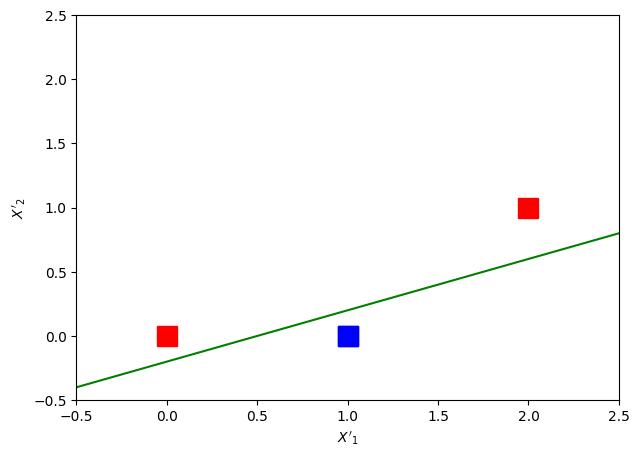

In [81]:
# original XOR data
X = np.array([ [0,0], [0,1], [1,0], [1,1] ])  
Y = np.array( [-1, 1, 1, -1] )                

Xnew = np.hstack( ( (X[:,0]+X[:,1]).reshape(4,1), (X[:,0]*X[:,1]).reshape(4,1)) ) 
                              # we derive two features: 
                              # the first one is the sum of the two input values, 
                              # the second one is the product of the input values

print("original data", X, "\n")
print("transformed data")
print("X1, X2, Y")
print(np.hstack((Xnew,Y.reshape(4,1))))
clf = Perceptron(fit_intercept = True)
clf.fit(Xnew, Y)
y_pred = clf.predict(Xnew)
print("perceptron accuracy on the transformed data:", accuracy_score(Y,y_pred))
print("Lin Separable also in this way.")
theta_perc = np.array([ [clf.intercept_[0]], [clf.coef_[0,0]], [clf.coef_[0,1]] ])

#Plotting
fig = plt.figure(figsize=(7,5))
plt.plot(Xnew[:, 0][Y == -1], Xnew[:, 1][Y == -1], 'rs', markersize=15)
plt.plot(Xnew[:, 0][Y == 1], Xnew[:, 1][Y == 1], 'bs', markersize=15)
plt.plot(np.linspace(-0.5,2.5,20), -theta_perc[1]/theta_perc[2]*np.linspace(-0.5,2.5,20)-theta_perc[0]/theta_perc[2], 'g')
plt.xlabel("$X'_1$")
plt.ylabel("$X'_2$")
plt.xlim([-0.5, 2.5])
plt.ylim([-0.5, 2.5])
plt.show()


We have plotted the perceptron in the transformed space. 

How would it look like in the original space?

Let's recall that we represented the peceptron in the new space as
$$ x'_2 = -\frac{\theta_1}{\theta_2}x'_1 -\frac{\theta_0}{\theta_2} $$

and we have that $x'_1 = x_1+x_2$ and $x'_2=x_1x_2$. 
If we replace $x'_1$ and $x'_2$ with $x_1$ and $x_2$ in the equation above, we get the representation of the perceptron in the original input space:

$$ x_2 = \frac{-\theta_1x_1-\theta_0}{\theta_2 x_1 + \theta_1} $$

Let's now plot it in black below (we also plot blue areas for the positive region and red ones for the negative class region)

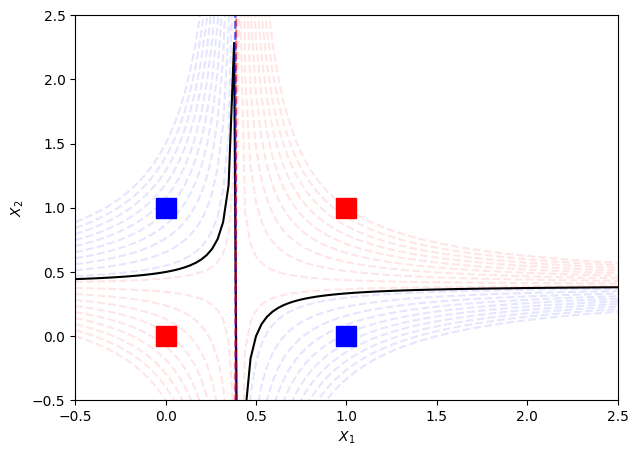

In [82]:
from mlxtend.plotting import plot_decision_regions

Xvalues = np.linspace(-0.5,2.5,100)
perceptron_on_X = -(theta_perc[1]*Xvalues)/(theta_perc[2]*Xvalues+theta_perc[1]) -theta_perc[0]/(theta_perc[2]*Xvalues+theta_perc[1])
perceptron_on_X_pos = -(theta_perc[1]*Xvalues)/(theta_perc[2]*Xvalues+theta_perc[1]) + (1-theta_perc[0])/(theta_perc[2]*Xvalues+theta_perc[1])
perceptron_on_X_neg = -(theta_perc[1]*Xvalues)/(theta_perc[2]*Xvalues+theta_perc[1]) + (-1-theta_perc[0])/(theta_perc[2]*Xvalues+theta_perc[1])

fig = plt.figure(figsize=(7,5))
plt.plot(X[:, 0][Y == -1], X[:, 1][Y == -1], 'rs', markersize=15)
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs', markersize=15)
plt.plot(Xvalues, perceptron_on_X, 'black')
for k in np.linspace(0.1,2,10):
  perceptron_on_X_pos = -(theta_perc[1]*Xvalues)/(theta_perc[2]*Xvalues+theta_perc[1]) + (k-theta_perc[0])/(theta_perc[2]*Xvalues+theta_perc[1])
  plt.plot(Xvalues, perceptron_on_X_pos, 'b', linestyle='dashed', alpha=0.1)
for k in np.linspace(-2,-0.1,10):  
  perceptron_on_X_neg = -(theta_perc[1]*Xvalues)/(theta_perc[2]*Xvalues+theta_perc[1]) + (k-theta_perc[0])/(theta_perc[2]*Xvalues+theta_perc[1])
  plt.plot(Xvalues, perceptron_on_X_neg, 'r', linestyle='dashed', alpha=0.1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.xlim([-0.5, 2.5])
plt.ylim([-0.5, 2.5])
plt.show()

Feature engineering is generally difficult and requires to be expert on the problem. We'll see two techniques to (partially) avoid having to do feature engineering (Neural networks and kernel methods, such as SVM). 